## Visualização dos dados - mapas

Nesse notebook são feitas as visualizações dos dados em mapas

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from utils.load_csv import load_csv
from utils.load_shp import load_shp
from utils.save_graph import save_graph

In [2]:
df_ppa_reg = load_csv("ppa_reg.csv")

gdf_subprefs = load_shp("subprefs.shp")

#### Mapas

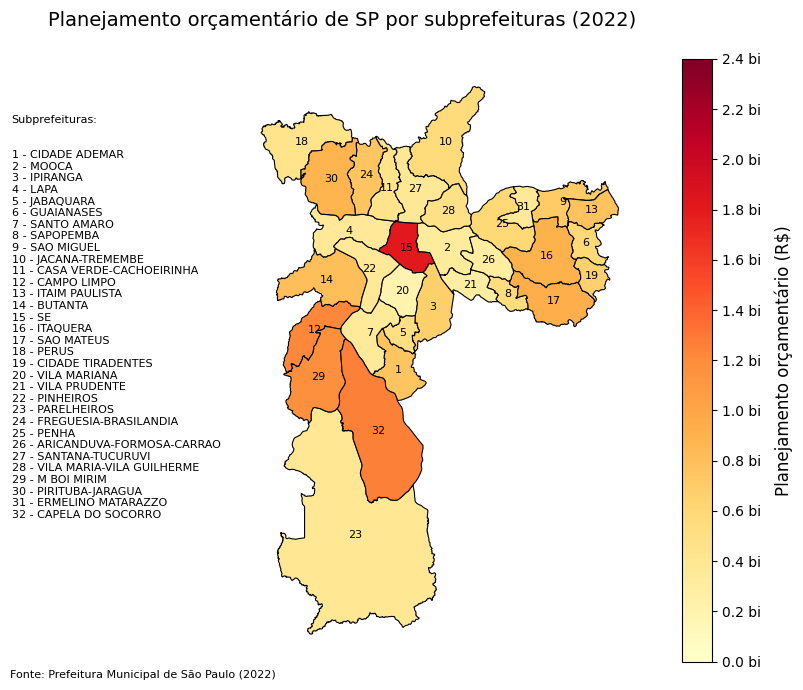

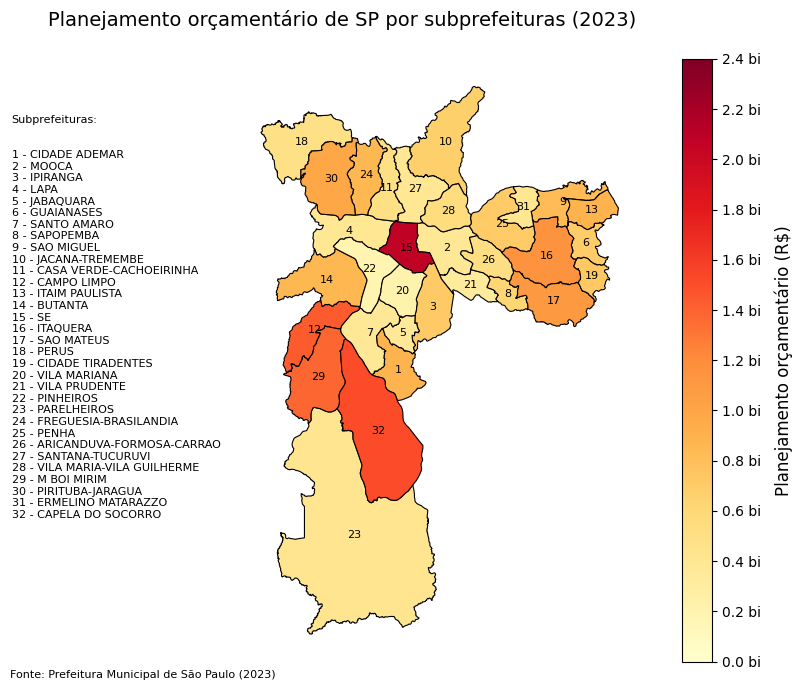

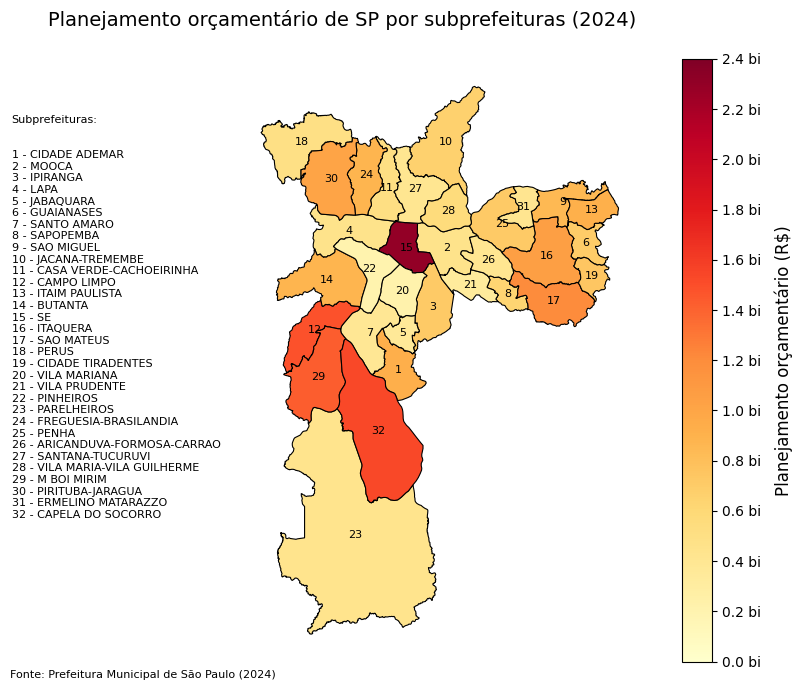

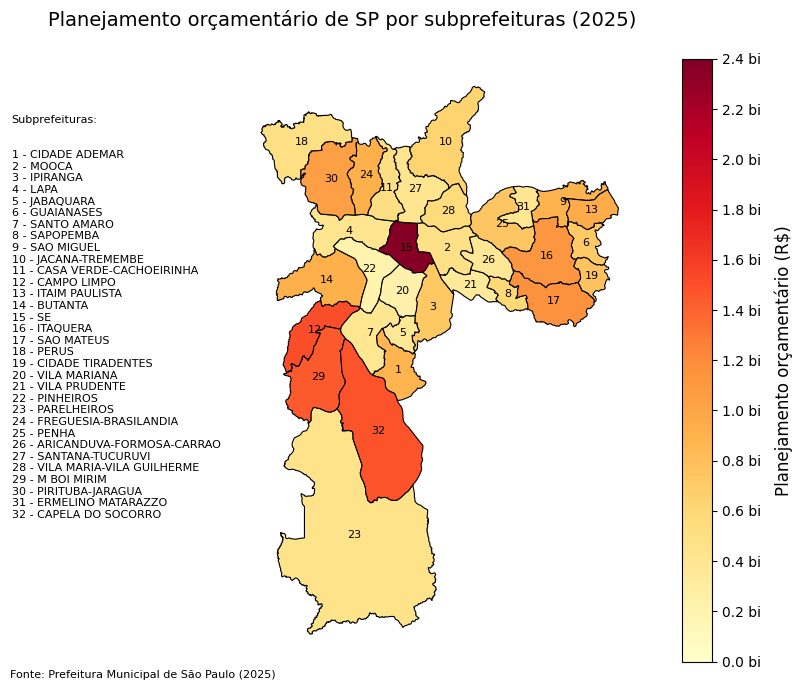

In [3]:
anos = [2022, 2023, 2024, 2025]

for ano in anos:
    col = f"valor {ano}"

    df_grouped_mapas = df_ppa_reg.groupby("descricao prefeitura regional")[[col]].sum().reset_index()

    gdf_mapa = gdf_subprefs.merge(df_grouped_mapas, 
                                  how = "left", 
                                  left_on = "nm_subpref", 
                                  right_on = "descricao prefeitura regional")

    fig, ax = plt.subplots(1, 1, figsize=(12, 7))

    gdf_mapa.plot(column = col,
                  cmap = "YlOrRd",
                  linewidth = 0.8,
                  edgecolor = "black",
                  legend = True,
                  ax = ax,
                  vmin = 0,
                  vmax = 2.4e9)

    plt.text(0.13, 0.95, 
             f"Planejamento orçamentário de SP por subprefeituras ({ano})",
             fontsize = 14, ha = "left", va = "center", transform = fig.transFigure)

    colorbar = ax.get_figure().get_axes()[1]
    ticks = np.arange(0, 2.5e9, 0.2e9)
    colorbar.yaxis.set_ticks(ticks)
    colorbar.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e9:.1f} bi'))
    colorbar.set_ylabel("Planejamento orçamentário (R$)", fontsize = 12, labelpad = 10)
    colorbar.set_ylim(0, 2.4e9)

    for idx, row in gdf_mapa.iterrows():
        centroid = row["geometry"].centroid
        ax.text(centroid.x, centroid.y, str(idx + 1), 
                color="black", fontsize = 8, ha = "center", va = "center")

    tabela_subprefs = gdf_mapa.reset_index()[["index", "nm_subpref"]]
    tabela_subprefs["index"] = tabela_subprefs["index"] + 1
    tabela_subprefs = tabela_subprefs.sort_values("index")
    tabela_texto = [f'{int(row["index"])} - {row["nm_subpref"]}' for _, row in tabela_subprefs.iterrows()]
    tabela_str = "\n".join(tabela_texto)

    plt.figtext(0.1, 0.8, "Subprefeituras:", fontsize = 8, ha = "left", va = "bottom")
    plt.figtext(0.1, 0.5, tabela_str, fontsize = 8, ha = "left", va = "center")

    pos = ax.get_position()
    ax.set_position([pos.x0 + 0.37, pos.y0, pos.width, pos.height])

    plt.figtext(0.32, 0.01, 
                f"Fonte: Prefeitura Municipal de São Paulo ({ano})", 
                ha = "right", fontsize = 8)

    ax.axis("off")
    plt.tight_layout()
    plt.show()

    save_graph(fig, f"mapa_ppa_{ano}.png")

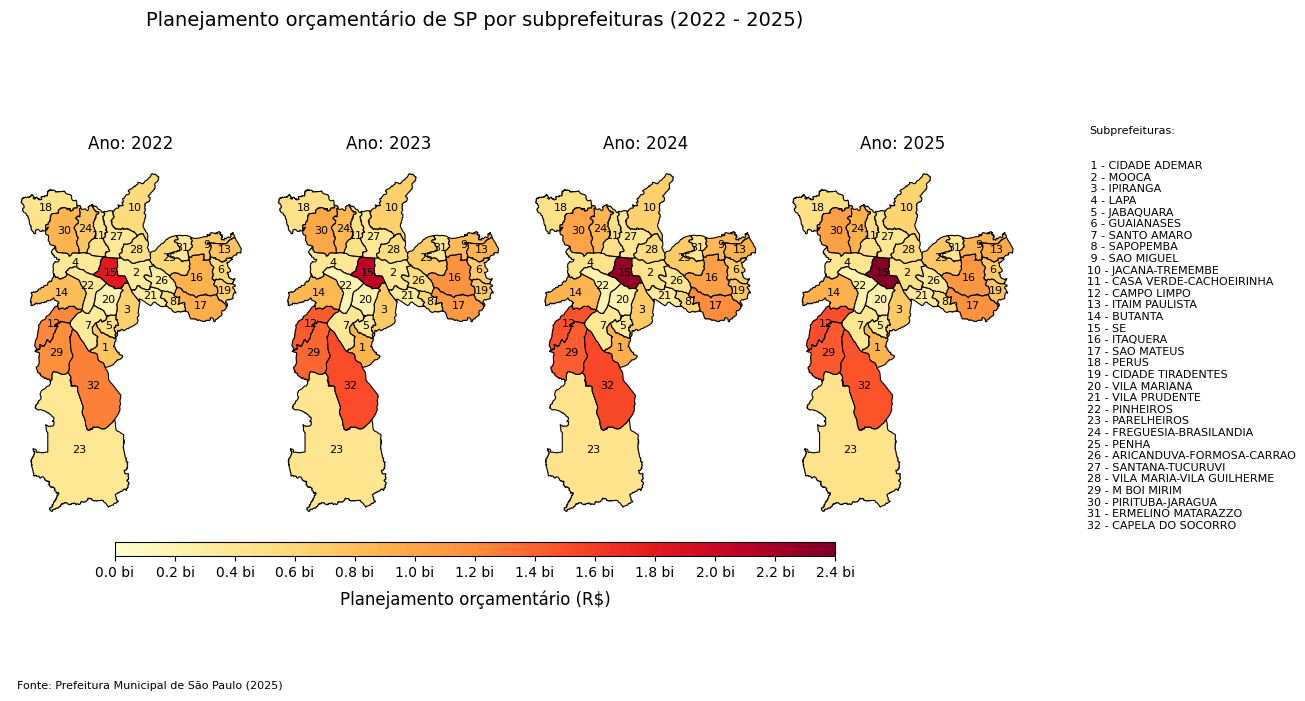

In [4]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning)

anos = ["2022", "2023", "2024", "2025"]

colunas = [f"valor {ano}" for ano in anos]

vmin, vmax = 0, 2.4e9

ticks = np.arange(0, 2.5e9, 0.2e9)

df_grouped_mapas = df_ppa_reg.groupby("descricao prefeitura regional")[colunas].sum().reset_index()

gdf_mapa = gdf_subprefs.merge(df_grouped_mapas,
                              how = "left",
                              left_on = "nm_subpref",
                              right_on = "descricao prefeitura regional")

fig, axs = plt.subplots(1, 4, figsize = (12, 7))

for i, ax in enumerate(axs.flat):
    col = colunas[i]
    ano = anos[i]

    gdf_mapa.plot(column = col,
                  cmap = "YlOrRd",
                  linewidth = 0.8,
                  edgecolor = "black",
                  ax = ax,
                  vmin = vmin,
                  vmax = vmax)

    for idx, row in gdf_mapa.iterrows():
        centroid = row["geometry"].centroid
        ax.text(centroid.x, centroid.y, str(idx + 1),
                color = "black", fontsize = 8, ha = "center", va = "center")

    ax.set_title(f"Ano: {ano}", fontsize=12)
    ax.axis("off")

cbar_ax = fig.add_axes([0.13, 0.2, 0.6, 0.02])
sm = plt.cm.ScalarMappable(cmap = "YlOrRd", norm = plt.Normalize(vmin = vmin, vmax = vmax))
sm._A = []
cbar = fig.colorbar(sm, cax = cbar_ax, orientation = "horizontal")

cbar.set_label("Planejamento orçamentário (R$)", fontsize = 12, labelpad = 8)
cbar.set_ticks(ticks)
cbar.ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e9:.1f} bi'))

fig.suptitle("Planejamento orçamentário de SP por subprefeituras (2022 - 2025)",
             fontsize = 14, y = 0.98, x = 0.43)

tabela_subprefs = gdf_mapa.reset_index()[["index", "nm_subpref"]]
tabela_subprefs["index"] += 1
tabela_subprefs = tabela_subprefs.sort_values("index")

tabela_texto = [f'{int(row["index"]):2d} - {row["nm_subpref"]}' for _, row in tabela_subprefs.iterrows()]
tabela_str = "\n".join(tabela_texto)

plt.figtext(0.942, 0.8, "Subprefeituras:", fontsize = 8, ha = "left", va = "bottom")
fig.text(0.94, 0.5, tabela_str, fontsize = 8, ha = "left", va = "center")

fig.text(0.27, 0.01, "Fonte: Prefeitura Municipal de São Paulo (2025)", ha = "right", fontsize = 8)

plt.tight_layout(rect=[0.03, 0.13, 0.9, 0.93])
plt.show()

save_graph(fig, "mapa_ppa_juntos.png")